# Numeros da Pobreza e Exclusao social (NUTS II)
O mais difícil é escolher os indicadores apropriados
Ver aqui:
- https://docs.google.com/spreadsheets/d/12MQaGqi1bD_HTd7NtKYBACUA3cByyocL966XsFzP-rU/edit?gid=0#gid=0
- https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_princindic 
- `indicadores_todos.xlsx`

## Pobreza

<Axes: xlabel='year'>

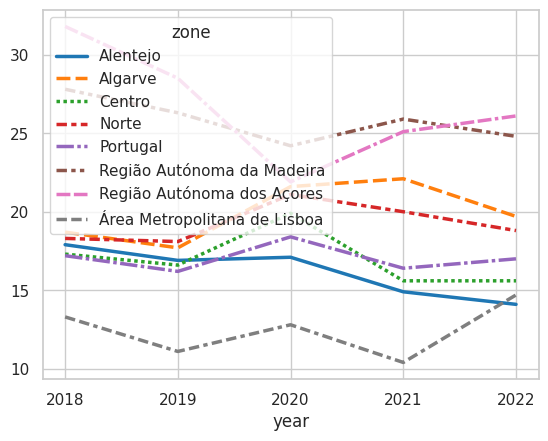

In [10]:
import pandas as pd
import requests
import seaborn as sns

query_indicador_base = f"https://www.ine.pt/ine/json_indicador/pindica.jsp?op=2"
query_meta_base = f"https://www.ine.pt/ine/json_indicador/pindicaMeta.jsp?"
SPATIAL = "<*>"  # PT
LANG = "PT"

sns.set_theme(style="whitegrid")


varcd_pobreza = "0009821"  # Taxa de risco de pobreza (Após transferências sociais - %)
temporal = "S7A2022,S7A2021,S7A2020,S7A2019,S7A2018"

query_pobreza = (
    f"{query_indicador_base}&varcd={varcd_pobreza}&Dim1={temporal}&lang={LANG}"
)
query_pobreza_meta = f"{query_meta_base}&varcd={varcd_pobreza}&lang={LANG}"


raw_data_pobreza = requests.get(query_pobreza)
dados = raw_data_pobreza.json()[0]["Dados"]
x = []
for year, data in dados.items():
    for obs_dict in data:
        x.append((year, obs_dict["geodsg"], float(obs_dict["valor"])))
df = pd.DataFrame.from_records(x, columns=["year", "zone", "pobreza"])

df_plot = df.pivot(index="year", columns="zone", values="pobreza")
sns.lineplot(data=df_plot, palette="tab10", linewidth=2.5)

## Pobreza ou Exclusão Social

<Axes: xlabel='year'>

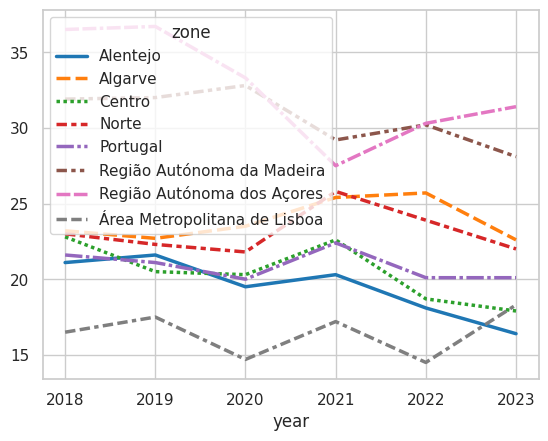

In [11]:
varcd_pobreza_exc_social = "0011685"  # Proporção da população residente em risco de pobreza ou exclusão social (Europa 2030) (%) 2023
temporal = "S7A2023,S7A2022,S7A2021,S7A2020,S7A2019,S7A2018"

query_pobreza_exc = f"{query_indicador_base}&varcd={varcd_pobreza_exc_social}&Dim1={temporal}&lang={LANG}"
query_pobreza_exc_meta = f"{query_meta_base}&varcd={varcd_pobreza_exc_social}&lang={LANG}"


raw_data_pobreza_exc = requests.get(query_pobreza_exc)
dados = raw_data_pobreza_exc.json()[0]["Dados"]
x = []
for year, data in dados.items():
    for obs_dict in data:
        x.append((year, obs_dict['geodsg'],float(obs_dict['valor'])))
df_exc = pd.DataFrame.from_records(x, columns=['year','zone','pobreza_exc'])

df_plot = df_exc.pivot(index='year', columns='zone', values='pobreza_exc')


sns.lineplot(data=df_plot, palette="tab10", linewidth=2.5)

In [9]:
df_exc

,year,zone,pobreza
0,2018,Região Autónoma dos Açores,36.5
1,2018,Região Autónoma da Madeira,31.9
2,2018,Portugal,21.6
3,2018,Norte,23.0
4,2018,Algarve,23.2
5,2018,Centro,22.8
6,2018,Área Metropolitana de Lisboa,16.5
7,2018,Alentejo,21.1
8,2019,Região Autónoma dos Açores,36.7
9,2019,Região Autónoma da Madeira,32.0
